In [6]:
!pip install pingouin category_encoders pydotplus pandas matplotlib sklearn seaborn numpy
import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [7]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import pingouin as pgimport 
from scipy.stats import chi2  
from scipy.stats import chi2_contingency  
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn import tree  
from sklearn.tree import export_graphviz  
from six import StringIO  
from sklearn.linear_model import Perceptron  
from sklearn.neural_network import MLPClassifier  
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix 
from category_encoders import BinaryEncoder  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt  
%matplotlib inline  
color = sns.color_palette()
seed = 42

# Predict probability of default
## Reading Data and preparing target

In [8]:
df = pd.read_csv('loan_data.csv')

In [9]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [12]:
for i in range(73) :
    if ( df.isna().sum()[i] >0 ):
        print( (df.isna().sum()[i]/len(df)) *100, "\t",df.isna().sum().index[i] )

5.916553180994456 	 emp_title
4.505399058515715 	 emp_length
0.0008578444513548581 	 annual_inc
72.98154562124023 	 desc
0.004289222256774291 	 title
0.006219372272322722 	 delinq_2yrs
0.006219372272322722 	 earliest_cr_line
0.006219372272322722 	 inq_last_6mths
53.690554060285024 	 mths_since_last_delinq
86.56658481400859 	 mths_since_last_record
0.006219372272322722 	 open_acc
0.006219372272322722 	 pub_rec
0.07291677836516293 	 revol_util
0.006219372272322722 	 total_acc
0.08063737842735666 	 last_pymnt_d
48.72856729253568 	 next_pymnt_d
0.00900736673922601 	 last_credit_pull_d
0.031096861361613604 	 collections_12_mths_ex_med
78.77392581790107 	 mths_since_last_major_derog
100.0 	 annual_inc_joint
100.0 	 dti_joint
100.0 	 verification_status_joint
0.006219372272322722 	 acc_now_delinq
15.071469165853502 	 tot_coll_amt
15.071469165853502 	 tot_cur_bal
100.0 	 open_acc_6m
100.0 	 open_il_6m
100.0 	 open_il_12m
100.0 	 open_il_24m
100.0 	 mths_since_rcnt_il
100.0 	 total_bal_il
100.0

In [13]:
# Drop all columns with null> 70%
list=['total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','verification_status_joint','dti_joint','dti_joint','mths_since_last_record','mths_since_last_major_derog','desc']
df.drop(list, axis=1, inplace=True)

In [14]:
df.drop(['annual_inc_joint','inq_last_12m'], axis=1, inplace=True)

In [15]:
for i in range(54) :
    if ( df.isna().sum()[i] >0 ):
        print( (df.isna().sum()[i]/len(df)) *100, "\t",df.isna().sum().index[i] )

5.916553180994456 	 emp_title
4.505399058515715 	 emp_length
0.0008578444513548581 	 annual_inc
0.004289222256774291 	 title
0.006219372272322722 	 delinq_2yrs
0.006219372272322722 	 earliest_cr_line
0.006219372272322722 	 inq_last_6mths
53.690554060285024 	 mths_since_last_delinq
0.006219372272322722 	 open_acc
0.006219372272322722 	 pub_rec
0.07291677836516293 	 revol_util
0.006219372272322722 	 total_acc
0.08063737842735666 	 last_pymnt_d
48.72856729253568 	 next_pymnt_d
0.00900736673922601 	 last_credit_pull_d
0.031096861361613604 	 collections_12_mths_ex_med
0.006219372272322722 	 acc_now_delinq
15.071469165853502 	 tot_coll_amt
15.071469165853502 	 tot_cur_bal
15.071469165853502 	 total_rev_hi_lim


In [16]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [17]:
df[['recoveries','total_rec_late_fee', 'total_rec_int', 'total_rec_prncp','collection_recovery_fee']].head(2) #after default variables

,recoveries,total_rec_late_fee,total_rec_int,total_rec_prncp,collection_recovery_fee
0,0.00,0.0,861.07,5000.00,0.00
1,117.08,0.0,435.17,456.46,1.11


In [18]:
df[['emp_title','url', 'purpose', 'title','zip_code', 'addr_state','title']].head(2)

,emp_title,url,purpose,title,zip_code,addr_state,title
0,NaN,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Computer
1,Ryder,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,bike


In [19]:
df.drop(['id','member_id','url'], axis=1, inplace=True)

In [20]:
df.drop(['recoveries','total_rec_late_fee', 'total_rec_int', 'total_rec_prncp','collection_recovery_fee'], axis=1, inplace=True)

df.describe()

In [21]:
target = 'loan_status'
df[target].value_counts(normalize = True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [22]:
#Any NA Values in target ?
print(df[target].isna().sum()  )

0


In [23]:
value=['Fully Paid','Charged Off','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off','Default']
df_new=df.loc[df[target].isin(value)]

In [24]:
df_new[target].value_counts()

Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [25]:
good=['Fully Paid']
bad=['Charged Off','Late (31-120 days)','Default','Does not meet the credit policy. Status:Charged Off'] 

In [26]:
df_new["target"]=np.where(df_new.loc[:, 'loan_status'].isin(bad), 0, 1) # bad is 0 good 1!!

In [27]:
df.columns , df.shape

(Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
        'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
        'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
        'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
        'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
        'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
        'collections_12_mths_ex_med', 'policy_code', 'application_type',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
       dtype='object'),
 (466285, 46))

In [28]:
df_new["term"].dtype

dtype('O')

In [29]:
import re
df_new["term"]=df_new["term"].apply(lambda x: re.sub(r' months','', str(x)))

In [30]:
df_new['emp_years'] = df_new['emp_length'].str.extract('(\d+)', expand=False)

In [31]:
df_new.drop("emp_length",axis=1,inplace=True)

In [32]:
df_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'target', 'emp_years'],
      dtype='object')

In [33]:
#processing columns

In [34]:
df_new.drop("zip_code",axis=1,inplace=True)

In [35]:
df_new[[  'purpose', 'title',  'addr_state', 'dti','annual_inc', 'verification_status', 'issue_d', 'loan_status','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','installment', 'grade', 'sub_grade', 'emp_title', 'home_ownership']].head(2)

,purpose,title,addr_state,dti,annual_inc,verification_status,issue_d,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership
0,credit_card,Computer,AZ,27.65,24000.0,Verified,Dec-11,Fully Paid,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,RENT
1,car,bike,GA,1.00,30000.0,Source Verified,Dec-11,Charged Off,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,RENT


In [36]:
df_new["purpose"].value_counts() #-- Binning

debt_consolidation    137510
credit_card            47150
home_improvement       13681
other                  13332
major_purchase          5851
small_business          4677
car                     3447
medical                 2670
wedding                 1974
moving                  1861
house                   1500
vacation                1443
educational              357
renewable_energy         254
Name: purpose, dtype: int64

In [37]:
df_new["title"].value_counts() #-- title by borrower.. similar to purpoe and random.. (DROP)

Debt consolidation                  59789
Credit card refinancing             19424
Debt Consolidation                  11260
Home improvement                     5312
Other                                4877
                                    ...  
Personal loan for consolidation         1
Paid in Full!!                          1
LOAN VACATION                           1
Just to get through the month           1
DREAMER                                 1
Name: title, Length: 48790, dtype: int64

In [38]:
df_new.drop("title",axis=1,inplace=True)

In [39]:
df_new["emp_title"].value_counts() #-- Binning

Teacher                              1633
Manager                              1597
RN                                    712
Registered Nurse                      708
Supervisor                            703
                                     ... 
Steward Home Care                       1
antelope valley care center             1
The Vitamin Shoppe                      1
North Charleston Sewer District         1
oakland county children's village       1
Name: emp_title, Length: 128385, dtype: int64

Text(0.5, 1.0, 'Count of default vs good by emp_title ')

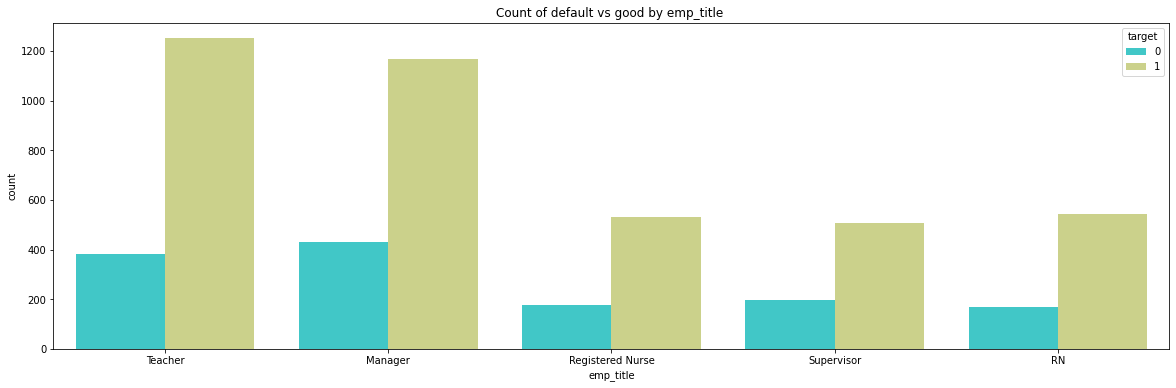

In [40]:
major_emp=["Teacher","Manager","RN","Registered Nurse","Supervisor"]
plt.figure(figsize=(20,6))
sns.countplot(x='emp_title',data=df_new[df_new["emp_title"].isin(major_emp)], palette='rainbow',hue='target')
plt.title("Count of default vs good by emp_title ")

In [41]:
df_new["verification_status"].value_counts() #-- Binning

Verified           87878
Not Verified       81439
Source Verified    66390
Name: verification_status, dtype: int64

In [42]:
df_new["home_ownership"].value_counts() #-- Binning

MORTGAGE    115861
RENT         99792
OWN          19857
OTHER          152
NONE            44
ANY              1
Name: home_ownership, dtype: int64

In [43]:
df_new[["loan_status","target"]]

,loan_status,target
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
5,Fully Paid,1
...,...,...
466276,Charged Off,0
466277,Charged Off,0
466278,Fully Paid,1
466281,Charged Off,0


In [44]:
df_new.drop("loan_status",axis=1,inplace=True)

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df_new[df_new["purpose"]=="home_improvement"]["target"].value_counts()

1    11076
0     2605
Name: target, dtype: int64

In [47]:
df_new[df_new["purpose"]=="debt_consolidation"]["target"].value_counts()

1    106441
0     31069
Name: target, dtype: int64

In [48]:
df_new[df_new["purpose"]=="credit_card"]["target"].value_counts()

1    38169
0     8981
Name: target, dtype: int64

Text(0.5, 1.0, 'Count of default vs good by purpose ')

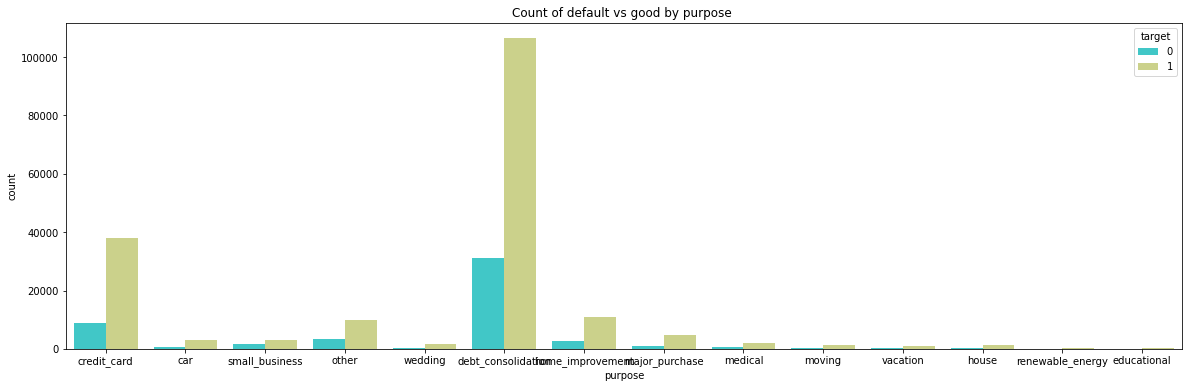

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(x='purpose',data=df_new, palette='rainbow',hue='target')
plt.title("Count of default vs good by purpose ")

Text(0.5, 1.0, 'Count of default vs good by verification_status ')

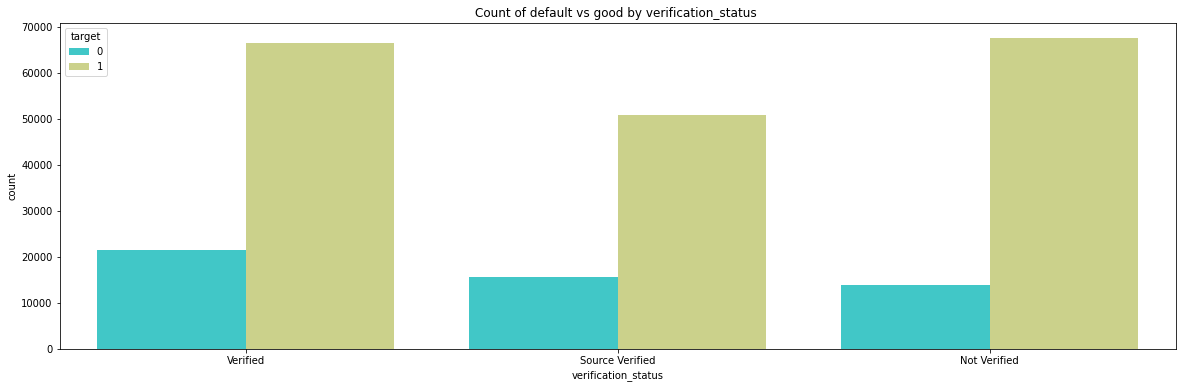

In [50]:
plt.figure(figsize=(20,6))
sns.countplot(x='verification_status',data=df_new, palette='rainbow',hue='target')
plt.title("Count of default vs good by verification_status ")

Text(0.5, 1.0, 'Count of default vs good by verification_status ')

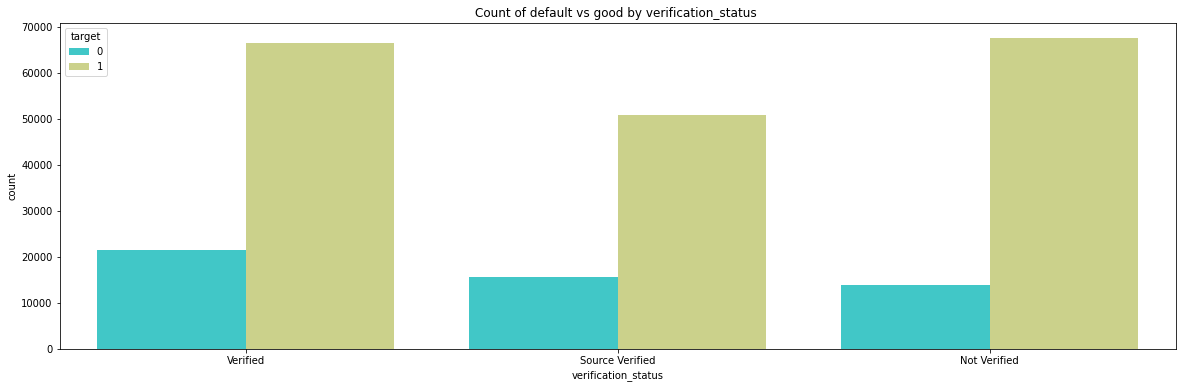

In [51]:
plt.figure(figsize=(20,6))
sns.countplot(x='verification_status',data=df_new, palette='rainbow',hue='target')
plt.title("Count of default vs good by verification_status ")

In [52]:
df_new.shape

(235707, 44)

In [53]:
df_new.shape

(235707, 44)

In [54]:
df_new[['addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp']].head(2)

,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp
0,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0
1,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0


In [55]:
df_new["initial_list_status"].value_counts() #-- binn

f    175058
w     60649
Name: initial_list_status, dtype: int64

In [56]:
df_new[['out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type']].head(2)

,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type
0,0.0,5861.071414,5831.78,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL
1,0.0,1008.710000,1008.71,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL


In [57]:
df_new["collections_12_mths_ex_med"].value_counts() #-- binn

0.0    234332
1.0      1220
2.0        66
3.0         7
4.0         2
5.0         1
6.0         1
Name: collections_12_mths_ex_med, dtype: int64

Text(0.5, 1.0, 'Count of default vs good by verification_status ')

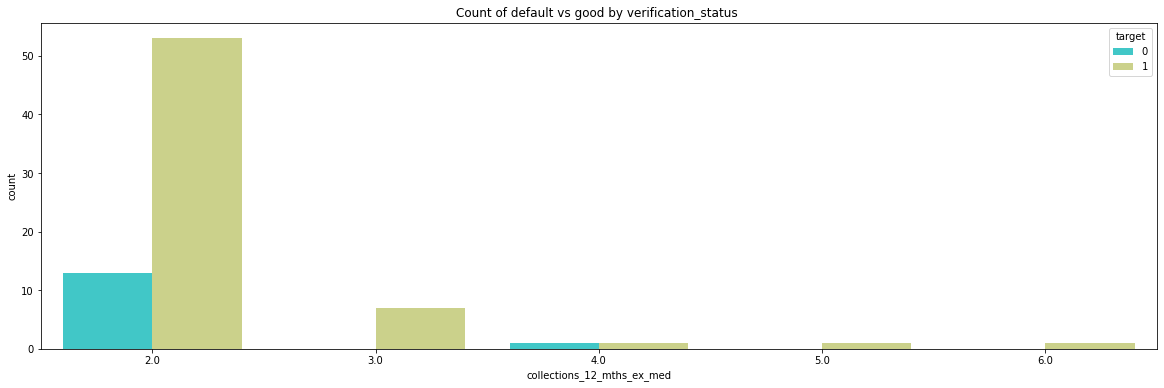

In [58]:
# Highly skewed.. willl be biased when coll is 4
plt.figure(figsize=(20,6))
sns.countplot(x='collections_12_mths_ex_med',data=df_new[df_new["collections_12_mths_ex_med"]>1], palette='rainbow',hue='target')
plt.title("Count of default vs good by verification_status ")

In [59]:
df_new["mths_since_last_delinq"].value_counts() #-- binn

12.0     1908
8.0      1904
9.0      1902
14.0     1899
10.0     1891
         ... 
103.0       1
113.0       1
100.0       1
109.0       1
152.0       1
Name: mths_since_last_delinq, Length: 125, dtype: int64

Text(0.5, 1.0, 'Count of default vs good by inq_last_6mths ')

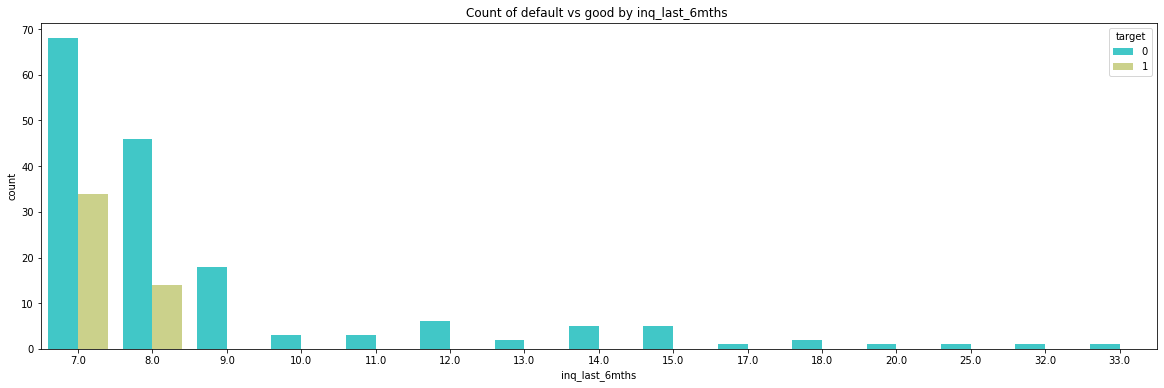

In [60]:
# skewed but informative.. can see more inq.. more default .. credit hungary borrower
plt.figure(figsize=(20,6))
sns.countplot(x='inq_last_6mths',data=df_new[df_new["inq_last_6mths"]>6], palette='rainbow',hue='target')
plt.title("Count of default vs good by inq_last_6mths ")

In [61]:
df_new[['acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'target', 'emp_years']].head(2)

,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,emp_years
0,0.0,NaN,NaN,NaN,1,10
1,0.0,NaN,NaN,NaN,0,1


In [62]:
df_new["acc_now_delinq"].value_counts() #-- binn

0.0    235068
1.0       601
2.0        29
3.0         3
5.0         2
4.0         1
Name: acc_now_delinq, dtype: int64

Text(0.5, 1.0, 'Count of default vs good by acc_now_delinq ')

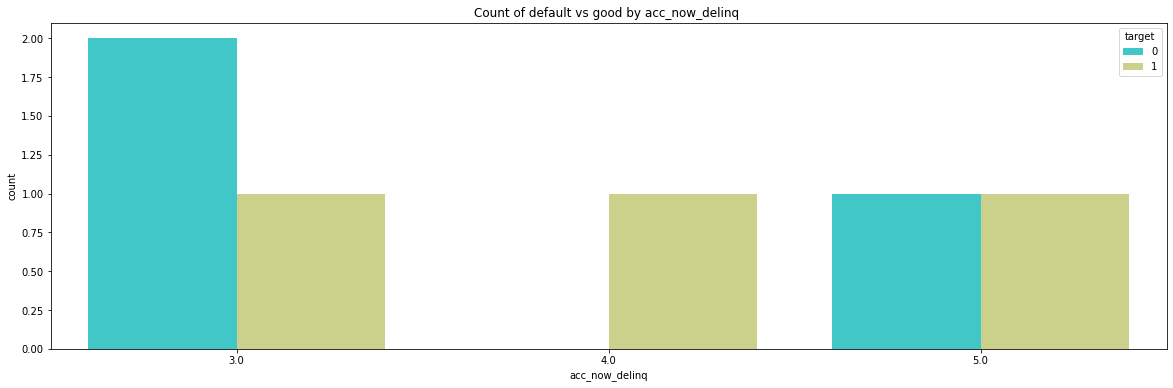

In [63]:
# 
plt.figure(figsize=(20,6))
sns.countplot(x='acc_now_delinq',data=df_new[df_new["acc_now_delinq"]>2], palette='rainbow',hue='target')
plt.title("Count of default vs good by acc_now_delinq ")

In [64]:
df_new["application_type"].value_counts() # all individual hence drop the column
df_new.drop("application_type",inplace=True,axis=1)

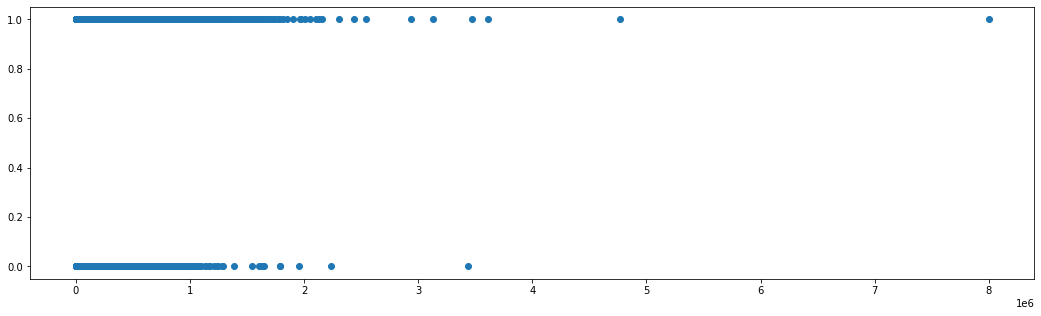

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,5))
plt.scatter(x="tot_cur_bal", y="target", data=df_new)
plt.show()

In [66]:
numerical = [var_1 for var_1 in df_new.columns if df_new[var_1].dtype=='int64' or df_new[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 27 numerical variables

The numerical variables are :

 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'target']


In [67]:
objectt = [var_1 for var_1 in df_new.columns if df_new[var_1].dtype=='O']

print('There are {} categorical variables\n'.format(len(objectt)))

print('The categorical variables are :\n\n', objectt)

There are 16 categorical variables

The categorical variables are :

 ['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'emp_years']


In [68]:
from sklearn import preprocessing

In [69]:
df_new[objectt]

,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,emp_years
0,36,B,B2,NaN,RENT,Verified,Dec-11,n,credit_card,AZ,Jan-85,f,Jan-15,NaN,Jan-16,10
1,60,C,C4,Ryder,RENT,Source Verified,Dec-11,n,car,GA,Apr-99,f,Apr-13,NaN,Sep-13,1
2,36,C,C5,NaN,RENT,Not Verified,Dec-11,n,small_business,IL,Nov-01,f,Jun-14,NaN,Jan-16,10
3,36,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,Dec-11,n,other,CA,Feb-96,f,Jan-15,NaN,Jan-15,10
5,36,A,A4,Veolia Transportaton,RENT,Source Verified,Dec-11,n,wedding,AZ,Nov-04,f,Jan-15,NaN,Sep-15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,60,D,D3,MANAGER,MORTGAGE,Verified,Jan-14,n,medical,MA,Nov-94,f,May-14,NaN,Oct-14,5
466277,36,A,A4,sales rep,RENT,Verified,Jan-14,n,debt_consolidation,MD,Jul-98,f,Nov-14,NaN,Oct-14,3
466278,36,D,D3,MecÃ¡nica,RENT,Source Verified,Jan-14,n,vacation,VA,Jun-02,f,Sep-15,NaN,Jan-16,10
466281,60,D,D5,Chief of Interpretation (Park Ranger),MORTGAGE,Verified,Jan-14,n,debt_consolidation,TN,Jun-97,f,Dec-14,NaN,Jan-16,10


In [70]:
# Feature selection
from sklearn.feature_selection import chi2


In [71]:
y = df_new['target']
X = df_new.drop('target',axis=1)

In [72]:
#chi_scores = chi2(X,y)

In [73]:
df_updated=df_new
df_updated.reset_index(drop=True, inplace=True)

In [74]:
from sklearn import preprocessing
import numpy as np
dict_recat = {}
for var in objectt:
    lb_make = preprocessing.LabelEncoder()
    df_updated[var] = lb_make.fit_transform(df_updated[var])
    mapping = dict(zip(lb_make.classes_, range(len(lb_make.classes_))))
    #print(mapping)
    dict_recat.update({var : np.array([*mapping])})

In [75]:
dict_recat

{'term': array([' 36', ' 60'], dtype='<U3'),
 'grade': array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U1'),
 'sub_grade': array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
        'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
        'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
        'G4', 'G5'], dtype='<U2'),
 'emp_title': array(['       NSA Industries llc', '   Bus Operator and Instructor',
        '   Long Ilsand College Hospital', ..., 'zozaya officiating',
        'zueck transportation', 'nan'], dtype='<U78'),
 'home_ownership': array(['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], dtype='<U8'),
 'verification_status': array(['Not Verified', 'Source Verified', 'Verified'], dtype='<U15'),
 'issue_d': array(['Apr-08', 'Apr-09', 'Apr-10', 'Apr-11', 'Apr-12', 'Apr-13',
        'Apr-14', 'Aug-07', 'Aug-08', 'Aug-09', 'Aug-10', 'Aug-11',
        'Aug-12', 'Aug-13', 'Aug-14', 'Dec-07', 'Dec-08', 'Dec-09',
        

In [76]:
df_updated[numerical]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_pymnt,total_pymnt_inv,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,5861.071414,5831.78,171.62,0.0,1,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,1008.710000,1008.71,119.66,0.0,1,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,3003.653644,3003.65,649.91,0.0,1,0.0,NaN,NaN,NaN,1
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,12226.302210,12226.30,357.48,0.0,1,0.0,NaN,NaN,NaN,1
4,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,NaN,...,5631.377753,5631.38,161.03,0.0,1,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235702,8525,8525,8525.0,18.25,217.65,37536.0,12.28,4.0,0.0,3.0,...,2029.930000,2029.93,217.65,0.0,1,0.0,0.0,116995.0,49800.0,0
235703,18000,18000,17975.0,7.90,563.23,90000.0,10.33,1.0,0.0,14.0,...,5631.670000,5623.85,563.23,0.0,1,0.0,0.0,42592.0,50300.0,0
235704,10000,10000,10000.0,18.25,362.78,42000.0,11.57,0.0,0.0,29.0,...,12394.165200,12394.17,5501.60,0.0,1,0.0,0.0,10170.0,11100.0,1
235705,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,NaN,...,4677.920000,4677.92,17.50,0.0,1,0.0,0.0,221830.0,39400.0,0


In [77]:
df_final = df_updated[numerical + objectt]

In [78]:
df_final

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,emp_years
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,19,0,1,3,249,0,40,71,41,1
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,19,0,0,10,50,0,5,71,99,0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,19,0,11,14,470,0,56,71,41,1
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,19,0,9,4,202,0,40,71,40,1
4,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,NaN,...,19,0,13,3,473,0,40,71,101,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235702,8525,8525,8525.0,18.25,217.65,37536.0,12.28,4.0,0.0,3.0,...,36,0,7,19,520,0,72,71,91,5
235703,18000,18000,17975.0,7.90,563.23,90000.0,10.33,1.0,0.0,14.0,...,36,0,2,20,313,0,80,71,91,3
235704,10000,10000,10000.0,18.25,362.78,42000.0,11.57,0.0,0.0,29.0,...,36,0,12,44,317,0,97,71,41,1
235705,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,NaN,...,36,0,2,41,363,0,23,71,41,1


In [79]:
df_final.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,emp_years
count,235707.000000,235707.000000,235707.000000,235707.000000,235707.000000,2.357070e+05,235707.000000,235704.000000,235704.000000,103619.000000,...,235707.000000,235707.000000,235707.000000,235707.000000,235707.000000,235707.000000,235707.000000,235707.000000,235707.000000,235707.000000
mean,13513.329791,13468.760898,13358.052670,13.843516,417.716184,7.192445e+04,16.448051,0.247289,0.881118,35.014708,...,47.918895,0.000025,2.847187,22.133831,322.860636,0.257307,52.813094,69.275775,48.363668,3.204173
std,8064.319558,8039.545746,8065.318448,4.390079,243.646712,5.501004e+04,7.694201,0.733228,1.112303,21.803956,...,26.415452,0.005045,2.621006,14.885004,186.452750,0.437151,28.602329,9.040056,24.040064,2.968941
min,500.000000,500.000000,0.000000,5.420000,15.690000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7300.000000,7200.000000,7200.000000,10.990000,240.350000,4.500000e+04,10.730000,0.000000,0.000000,17.000000,...,25.000000,0.000000,2.000000,6.000000,156.000000,0.000000,24.000000,71.000000,41.000000,1.000000
50%,12000.000000,12000.000000,11950.000000,13.660000,365.300000,6.154800e+04,16.150000,0.000000,1.000000,32.000000,...,50.000000,0.000000,2.000000,22.000000,317.000000,0.000000,55.000000,71.000000,41.000000,2.000000
75%,18000.000000,18000.000000,18000.000000,16.590000,546.345000,8.600000e+04,21.890000,0.000000,1.000000,51.000000,...,72.000000,0.000000,2.000000,34.000000,475.000000,1.000000,80.000000,71.000000,59.000000,5.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.990000,29.000000,33.000000,152.000000,...,90.000000,1.000000,13.000000,49.000000,634.000000,1.000000,98.000000,71.000000,102.000000,10.000000


In [80]:
df_final.shape

(235707, 43)

In [81]:
df_final.shape

(235707, 43)

In [82]:
# post default cols
#df_final.drop(["annual_inc_joint","recoveries"],axis=1,inplace=True)

In [83]:
df_final.isna().any()

loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
int_rate                      False
installment                   False
annual_inc                    False
dti                           False
delinq_2yrs                    True
inq_last_6mths                 True
mths_since_last_delinq         True
open_acc                       True
pub_rec                        True
revol_bal                     False
revol_util                     True
total_acc                      True
out_prncp                     False
out_prncp_inv                 False
total_pymnt                   False
total_pymnt_inv               False
last_pymnt_amnt               False
collections_12_mths_ex_med     True
policy_code                   False
acc_now_delinq                 True
tot_coll_amt                   True
tot_cur_bal                    True
total_rev_hi_lim               True
target                        False
term                        

In [84]:
contains_null = ['delinq_2yrs',"inq_last_6mths","mths_since_last_delinq","open_acc",'pub_rec',"revol_util","total_acc","collections_12_mths_ex_med","acc_now_delinq","tot_coll_amt","tot_cur_bal","total_rev_hi_lim"]

In [85]:
df_final[contains_null]

,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.0,1.0,NaN,3.0,0.0,83.7,9.0,0.0,0.0,NaN,NaN,NaN
1,0.0,5.0,NaN,3.0,0.0,9.4,4.0,0.0,0.0,NaN,NaN,NaN
2,0.0,2.0,NaN,2.0,0.0,98.5,10.0,0.0,0.0,NaN,NaN,NaN
3,0.0,1.0,35.0,10.0,0.0,21.0,37.0,0.0,0.0,NaN,NaN,NaN
4,0.0,3.0,NaN,9.0,0.0,28.3,12.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
235702,4.0,0.0,3.0,12.0,0.0,10.7,26.0,0.0,0.0,0.0,116995.0,49800.0
235703,1.0,0.0,14.0,16.0,0.0,16.3,33.0,0.0,0.0,0.0,42592.0,50300.0
235704,0.0,0.0,29.0,9.0,0.0,28.8,24.0,0.0,0.0,0.0,10170.0,11100.0
235705,0.0,5.0,NaN,18.0,1.0,46.3,30.0,0.0,0.0,0.0,221830.0,39400.0


In [86]:
df_final[["mths_since_last_delinq","tot_coll_amt","tot_cur_bal","total_rev_hi_lim","collections_12_mths_ex_med","revol_util"]]

,mths_since_last_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_12_mths_ex_med,revol_util
0,NaN,NaN,NaN,NaN,0.0,83.7
1,NaN,NaN,NaN,NaN,0.0,9.4
2,NaN,NaN,NaN,NaN,0.0,98.5
3,35.0,NaN,NaN,NaN,0.0,21.0
4,NaN,NaN,NaN,NaN,0.0,28.3
...,...,...,...,...,...,...
235702,3.0,0.0,116995.0,49800.0,0.0,10.7
235703,14.0,0.0,42592.0,50300.0,0.0,16.3
235704,29.0,0.0,10170.0,11100.0,0.0,28.8
235705,NaN,0.0,221830.0,39400.0,0.0,46.3


In [87]:
df_final[contains_null].min().min()
df_final=df_final.fillna(-999)

In [88]:
df_final.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
target                        0
term                          0
grade                         0
sub_grade                     0
emp_title                     0
home_own

In [89]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns=['target']), df_final['target'], test_size=0.33, random_state=42)'''

"from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns=['target']), df_final['target'], test_size=0.33, random_state=42)"

In [90]:
X = df_final.drop('target', axis = 1)
y = df_final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train, X_test = X_train.copy(), X_test.copy()

In [91]:
df_temp = X_train.copy()
ret_bins = pd.DataFrame()
for col in df_temp[df_temp.columns[~df_temp.columns.isin(contains_null)]].columns:
    df_temp[col] = pd.qcut(df_temp[col], 7, duplicates='drop')

In [92]:
import numpy as np
dict_recat2 = {}
for var in df_temp[df_temp.columns[~df_temp.columns.isin(contains_null)]].columns:
    lb_make2 = preprocessing.LabelEncoder()
    df_temp[var] = lb_make2.fit_transform(df_temp[var])
    mapping2 = dict(zip(lb_make2.classes_, range(len(lb_make2.classes_))))
    #print(mapping2)
    dict_recat2.update({var : np.array([*mapping2])})

In [93]:
bins=[]

In [94]:
df_temp = X_train.copy()
ret_bins = pd.DataFrame()
for col in contains_null:
    temp, bins = pd.qcut(df_temp[col], 7, duplicates='drop', retbins=True)
    #bins=list(bins)
    print(bins)
   # bins.insert(1, -1.0)
    bins = [-1000.0 if x==-999.0 else x for x in bins]
    print(bins)
    df_temp[col] = pd.cut(df_temp[col], bins, duplicates='drop')

[-999.    0.    1.   29.]
[-1000.0, 0.0, 1.0, 29.0]
[-999.    0.    1.    2.   33.]
[-1000.0, 0.0, 1.0, 2.0, 33.0]
[-999.    3.   22.   45.  152.]
[-1000.0, 3.0, 22.0, 45.0, 152.0]
[-999.    6.    8.    9.   11.   13.   16.   76.]
[-1000.0, 6.0, 8.0, 9.0, 11.0, 13.0, 16.0, 76.0]
[-999.    0.   11.]
[-1000.0, 0.0, 11.0]
[-999.    25.9   40.4   51.5   61.6   71.7   83.1  892.3]
[-1000.0, 25.9, 40.4, 51.5, 61.6, 71.7, 83.1, 892.3]
[-999.   13.   17.   21.   25.   30.   37.  118.]
[-1000.0, 13.0, 17.0, 21.0, 25.0, 30.0, 37.0, 118.0]
[-999.    0.    5.]
[-1000.0, 0.0, 5.0]
[-999.    0.    5.]
[-1000.0, 0.0, 5.0]
[-9.990000e+02  0.000000e+00  9.152545e+06]
[-1000.0, 0.0, 9152545.0]
[-9.99000000e+02  4.46300000e+03  2.42731429e+04  5.06408571e+04
  1.34194571e+05  2.39110857e+05  8.00007800e+06]
[-1000.0, 4463.0, 24273.142857142855, 50640.85714285713, 134194.57142857136, 239110.85714285713, 8000078.0]
[-9.990000e+02  3.800000e+03  1.200000e+04  1.860000e+04  2.700000e+04
  4.120000e+04  2.013

In [95]:
import numpy as np
dict_recat3 = {}
for var in contains_null:
    lb_make3 = preprocessing.LabelEncoder()
    df_temp[var] = lb_make3.fit_transform(df_temp[var])
    mapping3 = dict(zip(lb_make3.classes_, range(len(lb_make3.classes_))))
    #print(mapping3)
    dict_recat3.update({var : np.array([*mapping3])})

In [96]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(df_temp, y_train)

In [97]:
clf.predict_proba(X_train)

array([[1.85845415e-03, 9.98141546e-01],
       [4.90828597e-07, 9.99999509e-01],
       [1.07222742e-09, 9.99999999e-01],
       ...,
       [9.99999915e-01, 8.51988930e-08],
       [1.12045497e-05, 9.99988795e-01],
       [1.16972213e-06, 9.99998830e-01]])

In [98]:
roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]), roc_auc_score(y_train, clf.decision_function(X_train))

(0.9957372820078023, 0.9957380356548673)

In [99]:
clf.predict_proba(X_test)

array([[1.09083358e-04, 9.99890917e-01],
       [1.00000000e+00, 7.51104960e-15],
       [9.99999429e-01, 5.70891950e-07],
       ...,
       [9.95108997e-01, 4.89100265e-03],
       [3.04082341e-05, 9.99969592e-01],
       [2.22044605e-16, 1.00000000e+00]])

In [100]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, clf.decision_function(X_test))

(0.9956506807875257, 0.9956517029623145)